# Проверка корректноти модели

In [253]:
from analys.energy import Staticstics
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [254]:
# Функция для внутренней энергии
beta = 0.1155
def v_in(AMOUNT):
    return  np.sqrt(-np.log(np.random.uniform(0,1,AMOUNT)))/beta  * np.sin(2.0*np.pi*(np.random.uniform(0,1,AMOUNT)))

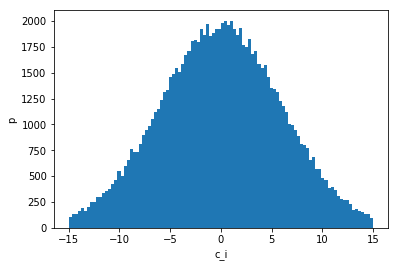

In [297]:
good = []
m = v_in(100000)
for i in m:
    if i > -15 and i < 15:
        good.append(i)

# распределение внутренней энергии
plt.hist(good, bins=100)
plt.ylabel("p")
plt.xlabel("c_i")
plt.show()

### Метод исключений

In [286]:
# метод исключений
def exlusion(function,x_min, x_max):
    x0 = np.random.uniform(x_min,x_max,1)[0]
    R = np.random.uniform(0,1,1)[0]
    if function(x0) > R:
        return x0
    else:
        return exlusion(function,x_min, x_max)

Проверим метод исключений на  распределении внутренних энергий.

In [290]:
def f(x):
    return np.exp(-beta ** 2 * x ** 2) 

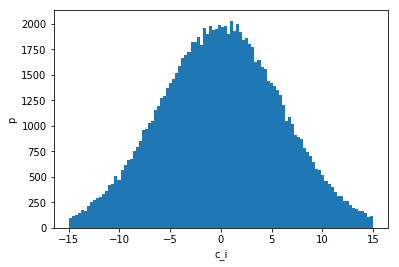

In [298]:
c_i = [exlusion(f, -15, 15) for i in xrange(100000)]
plt.hist(c_i, bins = 100)
plt.ylabel("p")
plt.xlabel("c_i")
plt.show()

Распределения получились схожи, значит метод работает корректно.

### Проверка функции $\gamma$

In [446]:
def k(b, lmbd):
    if b <= 1.4:
        return  -0.12 * b**3 - 0.09 * b **2 + 0.12 * b +  0.51
    elif b <= 2.6:
        l_max = -0.3 * b ** 3 + 2.16 * b ** 2 - 5.31 * b + 4.48
        if lmbd < l_max:
            return 1.4 * b - 1.69
    return 0.

def g_0(b, lmbd):
    if b <= 1.4:
        return  0.25 * b**3 -  0.22 * b**2 + 0.08 * b + 0.18
    elif b <= 2.6:
        l_max = -0.3 * b ** 3 + 2.16 * b ** 2 - 5.31 * b + 4.48
        if lmbd < l_max:
            return -0.39 *b ** 3 + 2.68 * b**2 - 6.17 * b + 4.91
    return 0.

def gamma_(b, lmbd):
    return  k(b, lmbd) * lmbd - k(b,lmbd) * g_0(b, lmbd)

def get_gamma(bb, lmbd):
    res = []
    for i in tqdm(xrange(len(bb))):
        res.append(gamma_(bb[i], lmbd[i]))
    return np.array(res)

Функция распределения для относительной скорости

In [462]:
def func(x):
    return 2 * beta ** 4 * x ** 3 * np.exp(-beta ** 2 * x ** 2)

def func_exclusion(x):
    return func(x) / func(np.sqrt(3./2.)/beta)

Насчитаем относительные скорости

In [463]:
c_r = [exlusion(func_1, 0, 40) for i in tqdm(xrange(100000))]


100%|██████████| 100000/100000 [00:05<00:00, 18457.00it/s]


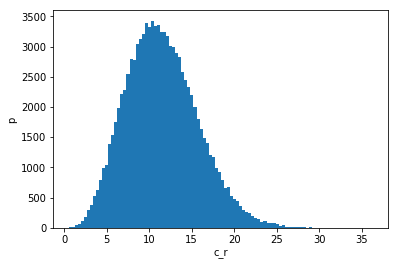

In [466]:
plt.hist(c_r, bins = 100)
plt.ylabel("p")
plt.xlabel("c_r")
plt.show()

Насчитаем внутренние кинетические энергии (вращательные) для наших 4 атомов (по x, y, z) 

In [468]:
c_1_x =v_in(100000)
c_1_y =v_in(100000)
c_1_z =v_in(100000)

E_i_1 = (c_1_x ** 2 + c_1_y  ** 2 + c_1_z ** 2)/2
E_i_2 = E_i_1 # у второго атома такая же кинетическая энергия (скорости равны, но противоположно направлены)

c_3_x =v_in(100000)
c_3_y =v_in(100000)
c_3_z =v_in(100000)

E_i_3 = (c_3_x ** 2 + c_3_y  ** 2 + c_3_z ** 2)/2
E_i_4 = E_i_3 # у второго атома такая же кинетическая энергия (скорости равны, но противоположно направлены)

Распределение колебательной энергии = распределению вращательной при равновесии

In [469]:
E_in = 2 * (E_i_1 + E_i_2 + E_i_3 + E_i_4)

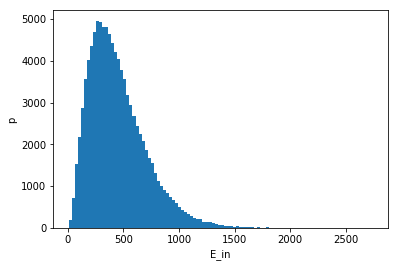

In [471]:
plt.hist(E_in, bins = 100)
plt.ylabel("p")
plt.xlabel("E_in")
plt.show()

Поступательная энергия

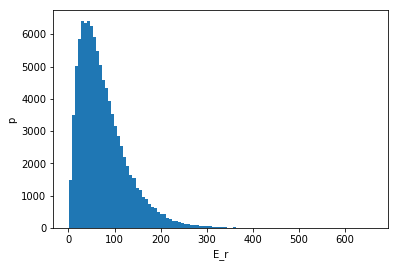

In [476]:
E_r = np.array(c_r) ** 2 / 2
plt.hist(E_r, bins = 100)
plt.ylabel("p")
plt.xlabel("E_r")
plt.show()

Полная энергия

In [475]:
H = E_r + E_in

Прицельные расстояния имеют равномерное распределение

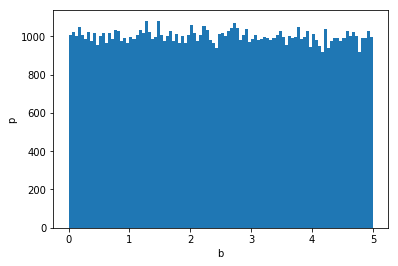

In [477]:
b = np.random.uniform(0,5,100000)
plt.hist(b, bins = 100)
plt.ylabel("p")
plt.xlabel("b")
plt.show()

Насчитаем $\gamma$

In [478]:
gamma = get_gamma(b, E_r/H)

100%|██████████| 100000/100000 [00:00<00:00, 211416.47it/s]


Получим скорость после столкновения как

$$
c_r' = \sqrt{c_r^2 - 2 \cdot H \cdot \gamma} 
$$

In [484]:
c_new = np.sqrt(np.array(c_r) ** 2 - 2 * H * gamma)

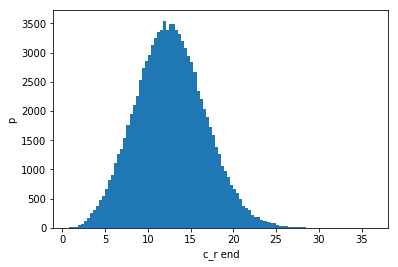

In [490]:
plt.hist(c_new, bins = 100)
plt.ylabel("p")
plt.xlabel("c_r end")
plt.show()

Распределения скорости после столкновения получилось похоже на изначальное. Сравним их.

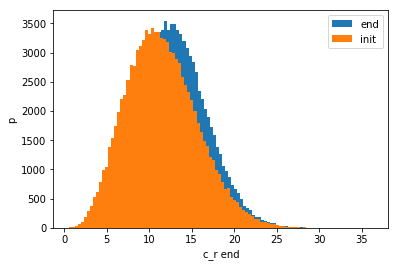

In [491]:
plt.hist(c_new, bins = 100, label = "end")
plt.hist(c_r, bins = 100, label = "init")
plt.ylabel("p")
plt.xlabel("c_r end")
plt.legend()
plt.show()

Распределения идентичны, что говорит о том, что первое начало термодинамики выполняется. Значит, модель корректна.